In [242]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [243]:
#Gerade
def line(x, a, b):
    return a + x * b

In [244]:
#Daten einlesen
with open('Messung6-1-1_7mm.txt') as data:
    z7mm = np.loadtxt(data, usecols= 0)
with open('Messung6-1-1_7mm.txt') as data:
    dobj7mm = 1E06*np.loadtxt(data, usecols= 1)

with open('Messung6-1-1-7_5mm.txt') as data:
    z7_5mm = np.loadtxt(data, usecols= 0)
with open('Messung6-1-1-7_5mm.txt') as data:
    dobj7_5mm = 1E06*np.loadtxt(data, usecols= 1)

with open('Messung6-1-1_8mm.txt') as data:
    z8mm = np.loadtxt(data, usecols= 0)
with open('Messung6-1-1_8mm.txt') as data:
    dobj8mm = 1E06*np.loadtxt(data, usecols= 1)

Plot der Specklegröße über den Abstand zum Schirm

d_spot calculateted for 7, 7.5 and 8mm: 2025.314294520861 1482.1733322343425 613.1057584364789
[0.3   0.15  0.075]
Theoretisch erwartete Specklesizes für 7mm Abstand:  [1880.53491828  940.26745914  470.13372957]
Theoretisch erwartete Specklesizes für 7.5mm Abstand:  [2802.76969867 1401.38484933  700.69242467]
Theoretisch erwartete Specklesizes für 8mm Abstand:  [7070.91775924 3535.45887962 1767.72943981]


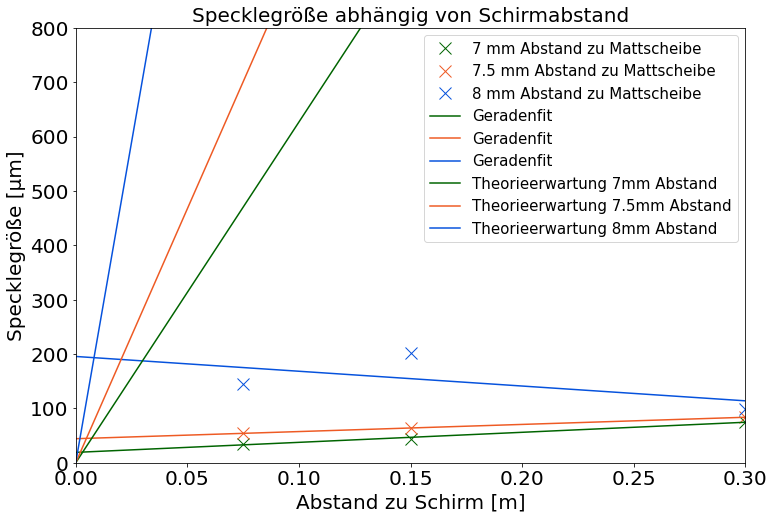

In [245]:
#Theoriefunktion
def dobj(z,dspot):
    res = 632.8E-09 * z/dspot
    return res

xlinspace = np.linspace(0,0.3)

#Plotten der Messdaten
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)
fig, ax = plt.subplots(figsize=(12,8))
#ax.set_xlim(30, 230)
ax.set_xlabel('Abstand zu Schirm [m]', fontsize=20)
ax.set_ylabel('Specklegröße [\u03bcm]', fontsize=20)


#Plot
ax.plot(z7mm, dobj7mm, 'x',markersize=12, color = "darkgreen",label = "7 mm Abstand zu Mattscheibe")
ax.plot(z7_5mm, dobj7_5mm, 'x',markersize=12, color = "#EE5A24",label = "7.5 mm Abstand zu Mattscheibe")
ax.plot(z8mm, dobj8mm, 'x',markersize=12, color = "#0652DD",label = "8 mm Abstand zu Mattscheibe")


#Geradenfits
params7mm, cov7mm = curve_fit(line,z7mm, dobj7mm)
params7_5mm, cov7_5mm = curve_fit(line,z7_5mm, dobj7_5mm)
params8mm, cov8mm = curve_fit(line,z8mm, dobj8mm)

ax.plot(xlinspace, line(xlinspace, params7mm[0], params7mm[1]), color = "darkgreen", label="Geradenfit")
ax.plot(xlinspace, line(xlinspace, params7_5mm[0], params7_5mm[1]), color = "#EE5A24", label="Geradenfit")
ax.plot(xlinspace, line(xlinspace, params8mm[0], params8mm[1]), color = "#0652DD", label="Geradenfit")


#Erwarteter d_spot
d_spot_7mm = 1E06*632.8E-09 * 0.15/(1E-06*line(0.15, params7mm[0], params7mm[1]))
d_spot_7_5mm = 1E06*632.8E-09 * 0.15/(1E-06*line(0.15, params7_5mm[0], params7_5mm[1]))
d_spot_8mm = 1E06*632.8E-09 * 0.15/(1E-06*line(0.15, params8mm[0], params8mm[1]))
print("d_spot calculateted for 7, 7.5 and 8mm:", d_spot_7mm, d_spot_7_5mm, d_spot_8mm)


#Theorieerwartung für d_speckle
ax.plot(xlinspace, 1E06*dobj(xlinspace, 1.0095E-04), color = "darkgreen", label="Theorieerwartung 7mm Abstand")
ax.plot(xlinspace, 1E06*dobj(xlinspace, 6.7733E-05), color = "#EE5A24", label="Theorieerwartung 7.5mm Abstand")
ax.plot(xlinspace, 1E06*dobj(xlinspace, 2.6848E-05), color = "#0652DD", label="Theorieerwartung 8mm Abstand")

print(z7mm)
print("Theoretisch erwartete Specklesizes für 7mm Abstand: ",1E06*dobj(z7mm, 1.0095E-04))
print("Theoretisch erwartete Specklesizes für 7.5mm Abstand: ",1E06*dobj(z7mm, 6.7733E-05))
print("Theoretisch erwartete Specklesizes für 8mm Abstand: ",1E06*dobj(z7mm, 2.6848E-05))

# print("Steigung:",params[1])
# print("Steigung Fehler:", np.sqrt(cov[1,1]))
# print("Y-Abschnitt:", params[0])
# print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))

plt.ylim(0,800)
plt.xlim(0,0.3)
plt.title("Specklegröße abhängig von Schirmabstand",fontsize=20)
ax.legend(fontsize=15)
plt.show()

Hier lassen wir den Abstand konstant und variieren die Spotgröße, indem wir den Abstand L1 zu M1 verändern

In [246]:
#Daten einlesen
with open('Messung_6_1_1_Konst30cm.txt') as data:
    dspot30cm = 1E06*np.loadtxt(data, usecols= 0)
with open('Messung_6_1_1_Konst30cm.txt') as data:
    dobj30cm = 1E06*np.loadtxt(data, usecols= 1)

with open('Messung_6_1_1-Konst15cm.txt') as data:
    dspot15cm = 1E06*np.loadtxt(data, usecols= 0)
with open('Messung_6_1_1-Konst15cm.txt') as data:
    dobj15cm = 1E06*np.loadtxt(data, usecols= 1)

with open('Messung6_1_1-Konst7_5cm.txt') as data:
    dspot7_5cm = 1E06*np.loadtxt(data, usecols= 0)
with open('Messung6_1_1-Konst7_5cm.txt') as data:
    dobj7_5cm = 1E06*np.loadtxt(data, usecols= 1)

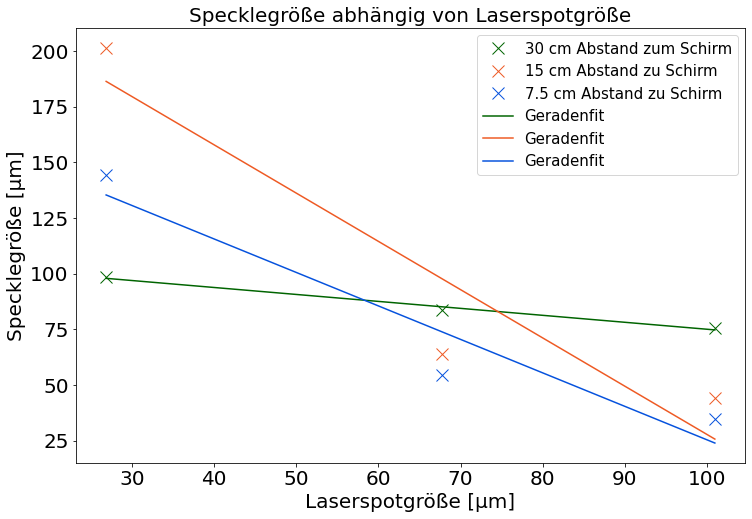

In [247]:
#Plotten der Messdaten
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)
fig, ax = plt.subplots(figsize=(12,8))
#ax.set_xlim(30, 230)
ax.set_xlabel('Laserspotgröße [\u03bcm]', fontsize=20)
ax.set_ylabel('Specklegröße [\u03bcm]', fontsize=20)

#Plot
ax.plot(dspot30cm, dobj30cm, 'x',markersize=12, color = "darkgreen",label = "30 cm Abstand zum Schirm")
ax.plot(dspot15cm, dobj15cm, 'x',markersize=12, color = "#EE5A24",label = "15 cm Abstand zu Schirm")
ax.plot(dspot7_5cm, dobj7_5cm, 'x',markersize=12, color = "#0652DD",label = "7.5 cm Abstand zu Schirm")

#Geradenfits
params30cm, cov30cm = curve_fit(line,dspot30cm, dobj30cm)
params15cm, cov15cm = curve_fit(line,dspot15cm, dobj15cm)
params7_5cm, cov7_5cm = curve_fit(line,dspot7_5cm, dobj7_5cm)
#x_fit = np.linspace(30,230)
ax.plot(dspot30cm, line(dspot30cm, params30cm[0], params30cm[1]), color = "darkgreen", label="Geradenfit")
ax.plot(dspot15cm, line(dspot15cm, params15cm[0], params15cm[1]), color = "#EE5A24", label="Geradenfit")
ax.plot(dspot7_5cm, line(dspot7_5cm, params7_5cm[0], params7_5cm[1]), color = "#0652DD", label="Geradenfit")

# print("Steigung:",params[1])
# print("Steigung Fehler:", np.sqrt(cov[1,1]))
# print("Y-Abschnitt:", params[0])
# print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))

plt.title("Specklegröße abhängig von Laserspotgröße",fontsize=20)
ax.legend(fontsize=15)
plt.show()

Plot der Specklegröße über den Apertur


In [248]:
#Daten einlesen
with open('Messung_6_1_2_AperturSpot.txt') as data:
    apertur = np.loadtxt(data, usecols= 0)
with open('Messung_6_1_2_AperturSpot.txt') as data:
    dspot = 1E06*np.loadtxt(data, usecols= 1)

with open('Messung_6_1_2_AperturSpeckle.txt') as data:
    apertur = np.loadtxt(data, usecols= 0)
with open('Messung_6_1_2_AperturSpeckle.txt') as data:
    dspeckle = 1E06*np.loadtxt(data, usecols= 1)

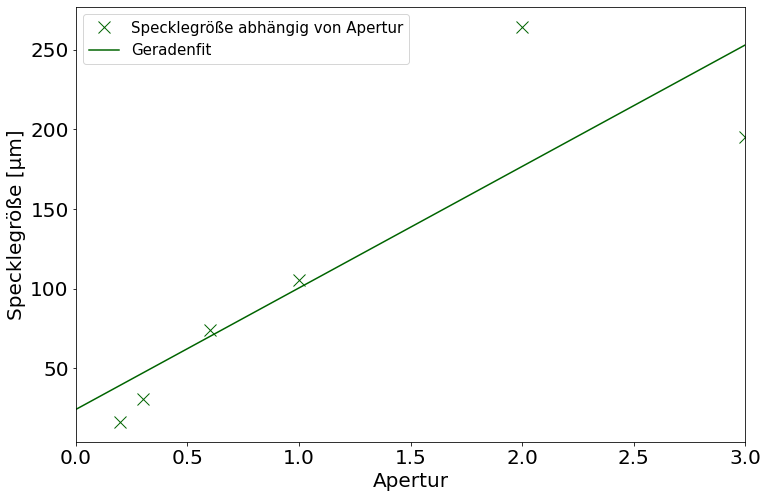

In [249]:
#Speckle
#Theoriefunktion
def dobj(D):
    res =  0.15* D/(2*0.05)
    return res

xlinspace = np.linspace(0,3)

#Plotten der Messdaten
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)
fig, ax = plt.subplots(figsize=(12,8))
#ax.set_xlim(30, 230)
ax.set_xlabel('Apertur', fontsize=20)
ax.set_ylabel('Specklegröße [\u03bcm]', fontsize=20)


#Plot
ax.plot(apertur, dspeckle, 'x',markersize=12, color = "darkgreen",label = "Specklegröße abhängig von Apertur")


#Geradenfits
paramsdspeckle, covspeckle = curve_fit(line,apertur, dspeckle)

ax.plot(xlinspace, line(xlinspace, paramsdspeckle[0], paramsdspeckle[1]), color = "darkgreen", label="Geradenfit")

#plt.ylim(0,800)
plt.xlim(0,3)
#plt.title("Specklegröße abhängig von Schirmabstand",fontsize=20)
ax.legend(fontsize=15)
plt.show()

Plot der Specklegröße über den Apertur

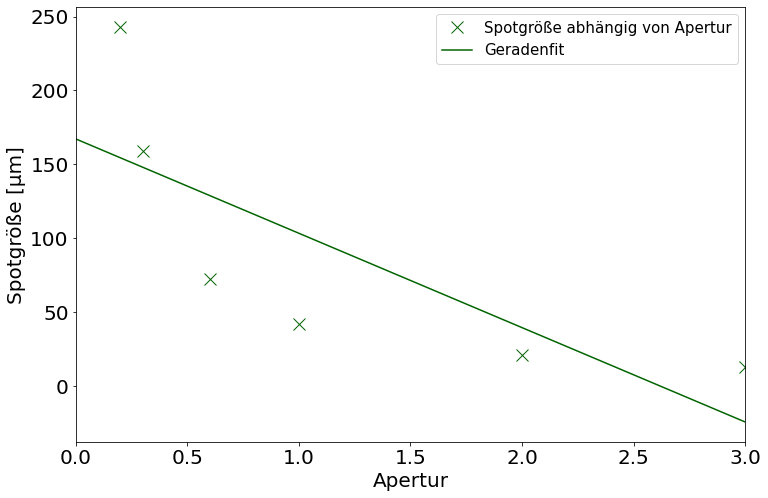

In [250]:
#Spotgröße abhängig von Apertur
#Theoriefunktion
def dspotfkt(D):
    res =  0
    return res

xlinspace = np.linspace(0,3)

#Plotten der Messdaten
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)
fig, ax = plt.subplots(figsize=(12,8))
#ax.set_xlim(30, 230)
ax.set_xlabel('Apertur', fontsize=20)
ax.set_ylabel('Spotgröße [\u03bcm]', fontsize=20)


#Plot
ax.plot(apertur, dspot, 'x',markersize=12, color = "darkgreen",label = "Spotgröße abhängig von Apertur")


#Geradenfits
paramsdspot, covspot = curve_fit(line,apertur, dspot)

ax.plot(xlinspace, line(xlinspace, paramsdspot[0], paramsdspot[1]), color = "darkgreen", label="Geradenfit")

#plt.ylim(0,800)
plt.xlim(0,3)
#plt.title("Specklegröße abhängig von Schirmabstand",fontsize=20)
ax.legend(fontsize=15)
plt.show()